## **TUGAS PRAKTIKUM**
### **Tugas Praktikum: Klasifiksi**

----

>### Data Mahasiswa
><p>Nama : Alvian Nur Firdaus<p>
>Kelas : 3H<p>
>Nim : 2141720022<p>
>Prodi : D-IV Teknik Inormatika<p>
>Jurusan : Teknologi Inormasi<p>
>

----

### **Tugas:**
[voice.csv (klik)](/Pertemuan%204/data/voice.csv)<p>
⬆Download Dataset Terlebih Dahulu ⬆<p>

1. Buatlah model klasifikasi dengan menggunakan SVM untuk data suara, voice.csv. 
2. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - Menggunakan data spam.csv
    - Fitur CountVectorizer dengan mengaktifkan stop_words
    - Evaluasi hasilnya
3. Buatlah model klasfikasi Multinomial Naive Bayes dengan ketentuan,
    - Menggunakan data spam.csv
    - Fitur TF-IDF dengan mengaktifkan stop_words
    - Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.
    - Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv

-----

### **Jawaban**

### **Jawaban Soal 1**

lakukan import library dan load data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('data/voice.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


kemudian hitung jumlah kemunculan setiap nilai (unique value) dalam kolom 'label' pada DataFrame 'df'. Hasilnya adalah serangkaian nilai yang unik beserta jumlah kemunculan masing-masing nilai tersebut dalam kolom 'label'

In [4]:
df['label'].value_counts()

male      1584
female    1584
Name: label, dtype: int64

Kemudian mengkodekan variabel kategori (label) menjadi nilai numerik

In [5]:
encoder = LabelEncoder()
df['label'] = encoder.fit_transform(df['label'])
df['label'].head()

0    1
1    1
2    1
3    1
4    1
Name: label, dtype: int32

Buat sebuah heatmap korelasi dari DataFrame 'df' menggunakan pustaka seaborn (sns) dan matplotlib (plt)

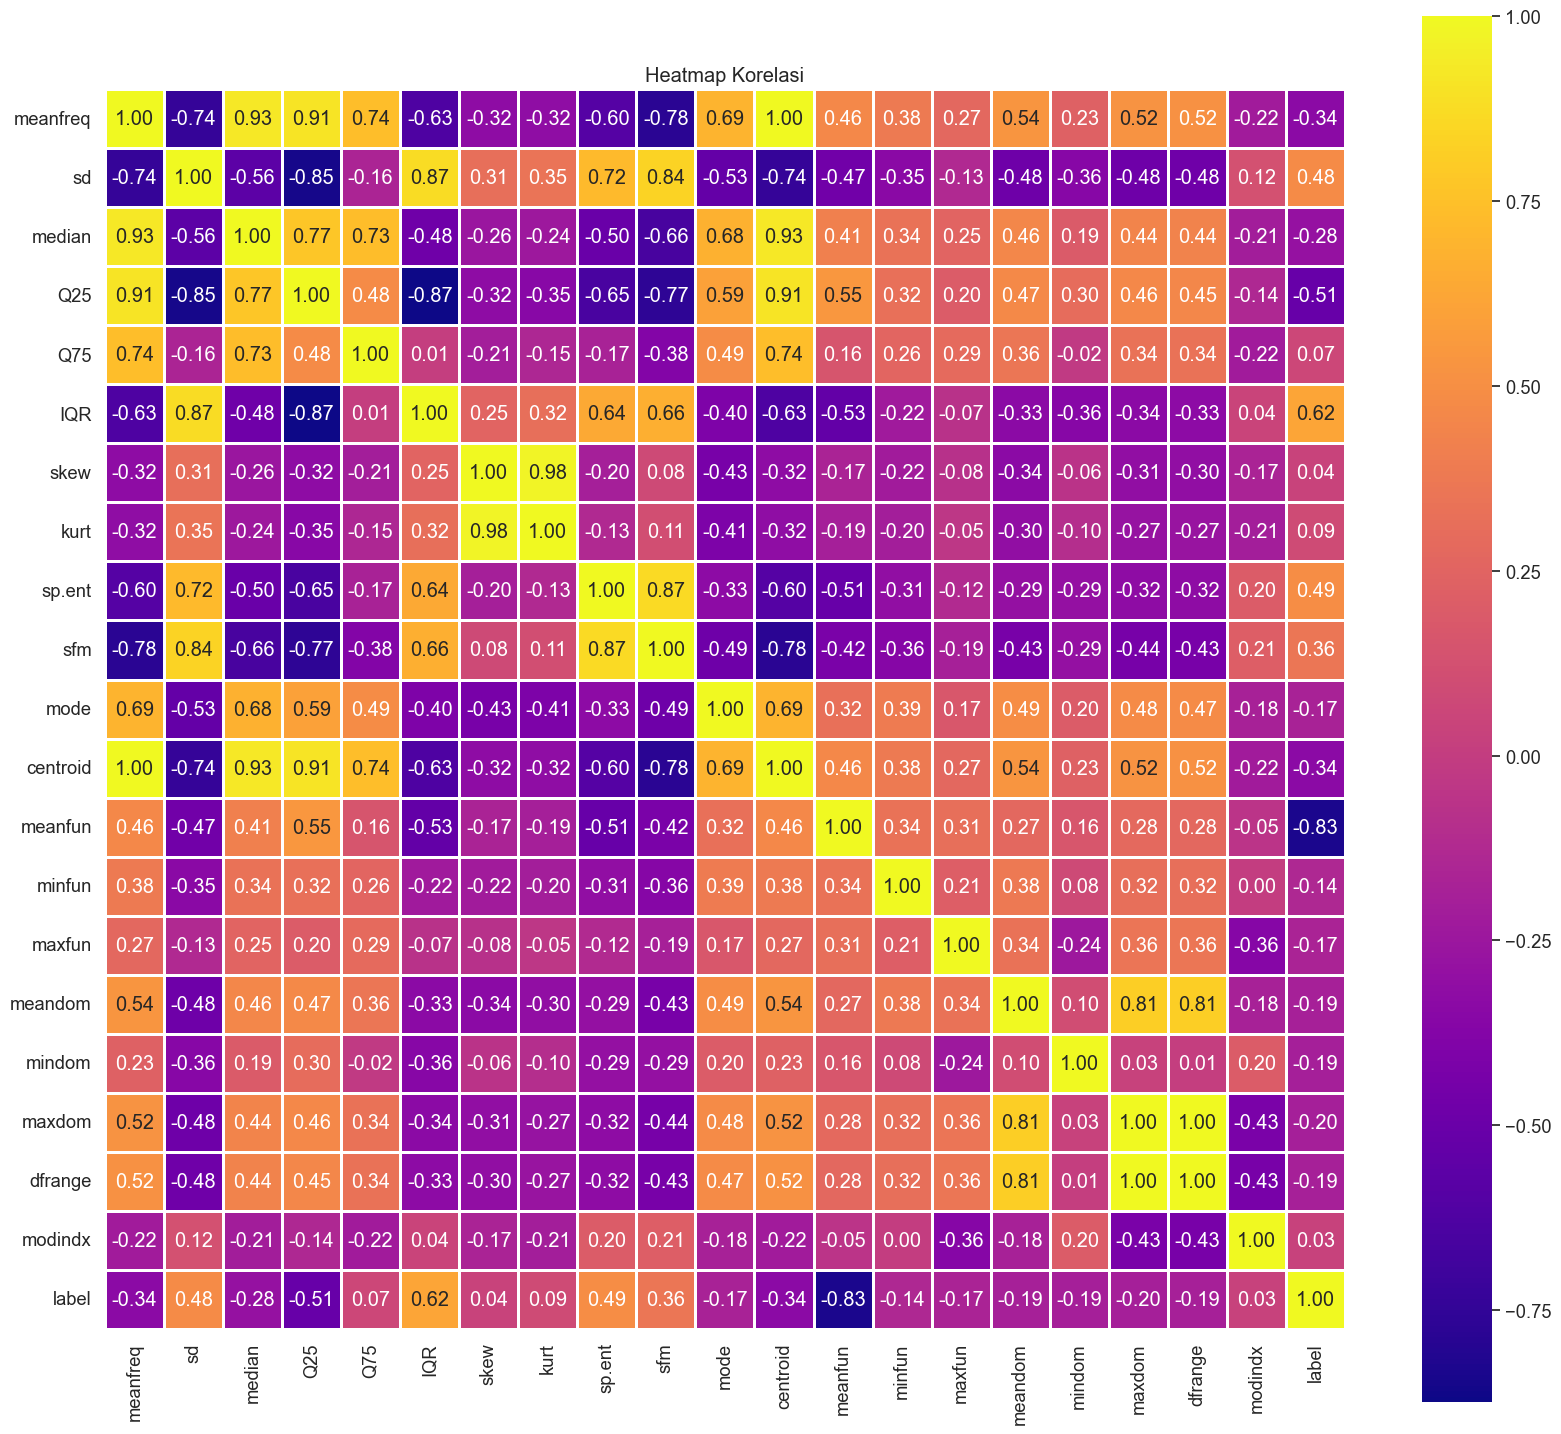

In [7]:
plt.figure(figsize=(20, 18))
corr_matrix = df.corr() 
sns.set(font_scale=1.2) 
sns.heatmap(corr_matrix, 
            cmap='plasma',
            linewidths=1, 
            fmt=".2f",
            annot=True,
            cbar=True, 
            square=True) 

plt.title('Heatmap Korelasi') 
plt.show()

Identifikasi Variabel Independen dan Dependen

In [8]:
X = df.iloc[:,:20]
y = df.label

Split Data Training dan Testing menjadi 70:30

In [9]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state = 1)
x1 = type(X.to_numpy())
x1

numpy.ndarray

lakukan Import Model SVM dan latih Model dengan Data Training dan Prediksi dengan Data Testing serta cek Akurasi Model SVM Terhadap Label Sebenarnya dan Hasil Prediksi

In [11]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc_model = SVC(kernel='linear', C=1.0, gamma='scale')
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)

# Hitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Cetak hasil akurasi
print(f'Skor Akurasi : {int(accuracy * 100)}%')

Skor Akurasi : 92%


### **Jawaban Soal 2**

1. **Menggunakan data spam.csv**

load data

In [13]:
df = pd.read_csv('data/spam.csv', encoding='latin-1') # spesifiksi encoding diperlukan karena data tidak menggunakan UTF-8

df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


drop 3 kolom terakhir dengan fungsi iloc kemudian cek data

In [14]:
df = df.drop(df.iloc[:,2:], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


ubah nama kolom v1 dan v2 kemudian lakukan cek data

In [15]:
new_cols = {
    'v1': 'Labels',
    'v2': 'SMS'
}

df = df.rename(columns=new_cols)

df.head()

,Labels,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


cek jumlah data perkelas, kelengkapan data dan cek statistik deskriptif

In [16]:
print(df['Labels'].value_counts())
print('\n')

print(df.info())
print('\n')

print(df.describe())

ham     4825
spam     747
Name: Labels, dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Labels  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None


       Labels                     SMS
count    5572                    5572
unique      2                    5169
top       ham  Sorry, I'll call later
freq     4825                      30


encode label

In [17]:
new_labels = {
    'spam': 1,
    'ham': 0
}

df['Labels'] = df['Labels'].map(new_labels)

df.head()

,Labels,SMS
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


Mamisahkan Fitur dengan Label


In [18]:
X = df['SMS'].values
y = df['Labels'].values

2. Fitur CountVectorizer dengan mengaktifkan stop_words

Split data training dan testing menjadi 70:30 serta lakukan Inisiasi CountVectorizer kemudian Fitting dan transform X_train dengan CountVectorizer kemudian Transform X_test

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)
bow = CountVectorizer(stop_words='english')

X_train = bow.fit_transform(X_train)

X_test = bow.transform(X_test)

3. **Evaluasi Hasil**

In [20]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

mnb = MultinomialNB()

mnb.fit(X_train, y_train)

y_pred_train = mnb.predict(X_train)

acc_train = accuracy_score(y_train, y_pred_train)

y_pred_test = mnb.predict(X_test)

acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:2f}%')
print(f'Hasil akurasi data test: {acc_test * 100:2f}%')

Hasil akurasi data train: 99.358974%
Hasil akurasi data test: 98.325359%


### **Jawaban Soal 3**

1. **Menggunakan data spam.csv**

In [21]:
X = df['SMS'].values
y = df['Labels'].values

2. **Fitur TF-IDF dengan mengaktifkan stop_words**

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Split data training dan testing menjadi 70:30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Inisiasi CountVectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fitting dan transform X_train dengan TF-IDF
X_train = tfidf.fit_transform(X_train)

# Transform X_test
X_test = tfidf.transform(X_test)

3. **Evaluasi hasilnya dan bandingkan dengan hasil pada Tugas no 2.**

In [23]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

# Inisiasi MultinomialNB
mnb = MultinomialNB()

# Fit model
mnb.fit(X_train, y_train)

# Prediksi dengan data training
y_pred_train = mnb.predict(X_train)

# Evaluasi akurasi data training
acc_train = accuracy_score(y_train, y_pred_train)

# Prediksi dengan data test
y_pred_test = mnb.predict(X_test)

# Evaluasi akurasi data training
acc_test = accuracy_score(y_test, y_pred_test)

# Print hasil evaluasi
print(f'Hasil akurasi data train: {acc_train * 100:f}%')
print(f'Hasil akurasi data test: {acc_test * 100:f}%')

Hasil akurasi data train: 98.410256%
Hasil akurasi data test: 96.351675%


4. **Berikan kesimpulan fitur mana yang terbaik pada kasus data spam.csv**

Berdasarkan hasil evaluasi akurasi pada model klasifikasi Multinomial Naive Bayes menggunakan dua jenis fitur, yaitu CountVectorized (CV) dan TF-IDF (Term Frequency-Inverse Document Frequency), dapat ditarik beberapa kesimpulan:

- CountVectorized (CV):
    - Akurasi data training menggunakan CV adalah sekitar 99.36%.
    - Akurasi data testing menggunakan CV adalah sekitar 98.33%.
    - Hasil akurasi yang tinggi pada data training dan testing menunjukkan bahwa model yang menggunakan fitur CV sangat baik dalam memprediksi apakah sebuah pesan adalah spam atau bukan.
    - Model ini mungkin agak overfitting karena perbedaan antara akurasi data training dan testing cukup besar, tetapi hasil akurasi pada testing masih sangat tinggi.<p>

- TF-IDF:
    - Akurasi data training menggunakan TF-IDF adalah sekitar 98.41%.
    - Akurasi data testing menggunakan TF-IDF adalah sekitar 96.35%.
    - Model yang menggunakan fitur TF-IDF juga memiliki hasil akurasi yang baik, meskipun sedikit lebih rendah dibandingkan dengan model menggunakan CV.
    - Perbedaan antara akurasi data training dan testing lebih kecil, menunjukkan model TF-IDF mungkin lebih umum dan tidak terlalu spesifik pada data training.